In [2]:
from astropy.table import Table, join
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Read in clumpy data -- Contains everything but dupes are marked

In [2]:
clumpy_coadd = Table.read('../data/gzh_sdss_strictclumpy_coadd.fits')    
#print clumpy_coadd.colnames

clumpy_single = Table.read('../data/gzh_sdss_strictclumpy_single.fits')
clumpy_single = clumpy_single[clumpy_single['unique']==True]

## Found a couple dupes labeled as unique -- fixing it

In [20]:
# This has already been fixed -- don't run this cell again.
#dupes = [8647475120901062769, 8647475120924131434]
#for dupe in dupes:
#    loc = np.where(clumpy_coadd['survey_id']==str(dupe))[0]
#    print loc
#    print clumpy_coadd['survey_id','RA','DEC','unique'][loc-1:loc+2]
    
#clumpy_coadd['unique'][np.where(clumpy_coadd['survey_id']==str(8647475120901062768))]=True
#clumpy_coadd['unique'][np.where(clumpy_coadd['survey_id']==str(8647475120901062769))]=False
#clumpy_coadd['unique'][np.where(clumpy_coadd['survey_id']==str(8647475120924131434))]=False

# Save the adjusted catalog 
#clumpy_coadd.write('../data/gzh_sdss_strictclumpy_coadd.fits', overwrite=True)

[77]
     survey_id            RA            DEC        unique
------------------- ------------- ---------------- ------
8647475120901062768 351.093555154  -0.104282932131  False
8647475120901062769  351.10157944 -0.0999749121353   True
8647475120914366651 21.5514325682 -0.0246489616184   True
[79]
     survey_id            RA            DEC        unique
------------------- ------------- ---------------- ------
8647475120914366651 21.5514325682 -0.0246489616184   True
8647475120924131434 43.7817355953  -0.176948801486   True
8647475120924131439 43.7982190153  -0.180312254226   True


In [3]:
clumpy_coadd = clumpy_coadd[clumpy_coadd['unique']==True]

In [4]:
print "Total clumpy galaxies (coadd-depth):",len(clumpy_coadd)
print "Total clumpy galaxies (single-depth):", len(clumpy_single)

Total clumpy galaxies (coadd-depth): 92
Total clumpy galaxies (single-depth): 105


## Match clumpy catalogs with DR12 ancillary data

In [5]:
dr12_single = Table.read('../../GalaxyZoo/catalogs/GZ2_DR12_Single_Primary_highzgal.csv')
dr12_coadd = Table.read('../../GalaxyZoo/catalogs/GZ2_DR12_Coadd_Primary_highzgal.csv')

In [6]:
# Need to recast the survey_id as an INT and give it a more useful colname
clumpy_single['DR7objid'] = [int(i) for i in clumpy_single['survey_id']]
clumpy_single_dr12 = join(clumpy_single, dr12_single, keys='DR7objid')

clumpy_coadd['DR7objid'] = [int(i) for i in clumpy_coadd['survey_id']]
clumpy_coadd_dr12 = join(clumpy_coadd, dr12_coadd, keys='DR7objid')

In [34]:
dr12_single.colnames

['int_id',
 'ra1',
 'dec1',
 'DR7objid',
 'DR12objid',
 'separation',
 'ra2',
 'dec2',
 'specObjID',
 'petroMag_u',
 'petroMag_g',
 'petroMag_r',
 'petroMag_i',
 'petroMag_z',
 'petroMagErr_u',
 'petroMagErr_g',
 'petroMagErr_r',
 'petroMagErr_i',
 'petroMagErr_z',
 'extinction_u',
 'extinction_g',
 'extinction_r',
 'extinction_i',
 'extinction_z',
 'petroR50_r',
 'petroR50Err_r',
 'petroR90_r',
 'petroR90Err_r',
 'petror50_i',
 'petroR50Err_i',
 'petroR90_i',
 'petroR90Err_i',
 'z']

In [7]:
redshift1, redshift2 = [], []

for z in clumpy_single_dr12['z']:
    try:
        redshift1.append(float(z))
    except:
        redshift1.append(np.nan)
        
for z in clumpy_coadd_dr12['z']:
    try:
        redshift2.append(float(z))
    except:
        redshift2.append(np.nan)

clumpy_single_dr12['z'] = redshift1
clumpy_coadd_dr12['z'] = redshift2

print "Single depth without redshift:", np.sum(np.isnan(np.array(redshift1)))
print "Coadd depth without redshift:", np.sum(np.isnan(np.array(redshift2)))

Single depth without redshift: 9
Coadd depth without redshift: 16


## Of the coadd-depth, how many are actually missing spectra? 

In [8]:
clumpy_coadd_dr12['DR7objid','ra1', 'dec1'][np.isnan(clumpy_coadd_dr12['z'])]

DR7objid,ra1,dec1
int64,float64,float64
8647474690327511467,344.106140137,-1.20750248432
8647474690339438846,11.3885126114,-1.10587835312
8647474690891186220,45.2680587769,-0.745945155621
8647474691428581676,46.556968689,-0.340464025736
8647474692485415569,7.94801616669,0.558744370937
8647474692508025103,59.5210876465,0.608293354511
8647474693000135292,317.311187744,0.983827054501
8647474693026873809,18.4146137238,0.874948680401
8647475119817098026,327.798614502,-0.943649828434


## Of the coadd-depth, only 4 of the 16 truly don't have spectra

8647474690327511467

8647474692508025103

8647475120930947191 

8647475122500272195

FIXED ABOVE: 
Duplicate: 8647475120901062769, 8647475120924131434

## Of the single-depth, only two of the 9 truly don't have spectra
(According to SDSS DR12 Navigator)

587731185661575564

587731512623562859

Find the missing spectra! Are they in GZ2 DR7? 

## Re-selected from CasJobs the spectra within 30" for each of our clumpy galaxies in both coadd and single depth imaging

In [8]:
coadd_spec = Table.read('../data/CasJobsDLs/clumpy_coadd_spectra_highzgal.csv')
single_spec = Table.read('../data/CasJobsDLs/clumpy_single_spectra_highzgal.csv')

In [9]:
coadd_gals = {'objid':[], 'ra':[], 'dec':[], 'num_spec':[], 'z_avg':[], 'z_sig':[]}
coadd_grpd = coadd_spec.group_by('OBJID') 

for grp in coadd_grpd.groups:
    coadd_gals['objid'].append(grp['OBJID'][0])
    coadd_gals['num_spec'].append(len(grp))
    coadd_gals['ra'].append(grp['RA'][0])
    coadd_gals['dec'].append(grp['DEC'][0])
    coadd_gals['z_avg'].append(np.mean(grp['z']))
    coadd_gals['z_sig'].append(np.std(grp['z']))
    
print len(coadd_gals['objid'])

# How well do these match up to our list of no-redshift gals above?
nomatch = set(clumpy_coadd_dr12['DR7objid'])- set(coadd_gals['objid'])
print nomatch


87
set([8647475120901062768, 8647474692508025103, 8647475122500272195, 8647474690327511467, 8647475120930947191])


## Spectra I found seem to match up (coadd)
I've compared the list of objids for galaxies which truly don't have spectra according to SDSS DR12 Navigator and they are all found in the nomatch list. Additionally, the spectra list I have doesn't have a 5th objid but that's because it is an objid of a duplicate object and I decided I like the other RA/DEC better. Therefore, I should have redshifts for everything once I combine these catalogs.

8647475120901062768 <--> 8647475120901062769

## Go through the spectra and remove those that aren't associated

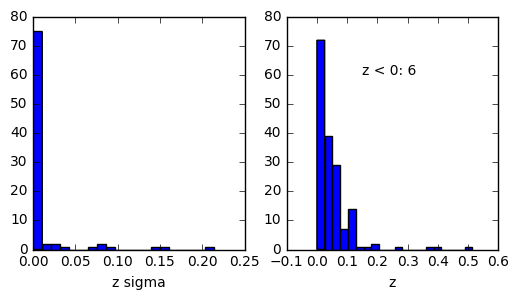

In [11]:
# Obvious places to look for "wrong" spectra

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(121)
ax.hist(coadd_gals['z_sig'], bins=20)
ax.set_xlabel('z sigma')

ax = fig.add_subplot(122)
ax.hist(coadd_spec['z'], bins=20)
ax.set_xlabel('z')
ax.text(0.15, 60, 'z < 0: '+str(np.sum(coadd_spec['z']<=0.)))

In [14]:
coadd_gals['z_sig'] = np.array(coadd_gals['z_sig'])
mask = coadd_gals['z_sig']>=0.02

coadd_gals = Table(coadd_gals)
coadd_gals['objid','ra','dec', 'num_spec', 'z_avg', 'z_sig'][mask]

objid,ra,dec,num_spec,z_avg,z_sig
int64,float64,float64,int64,float64,float64
8647474690891186220,45.26806,-0.7459452,4,0.0525024635,0.0757887455766
8647474691421700189,30.75459,-0.2727283,2,0.02369529428,0.02365152572
8647474693019795713,2.135657,1.039021,3,0.13456656,0.0917990133779
8647474693040701887,49.95135,0.9330298,3,0.19026659,0.139930491735
8647475120353641569,327.0714,-0.5146422,3,0.21178037,0.214325833619
8647475120369369145,2.916573,-0.4739119,3,0.0381182310333,0.0271455568004
8647475120390864910,51.98473,-0.471713,2,0.0811687029,0.0810425971
8647475121445732615,9.002549,0.2758846,2,0.13901236,0.06589694
8647475121466572880,56.52864,0.3902827,3,0.14432717,0.16056468704


## Coadd spectra exploration
-----------------
### Spectra mis-match (z_sig > 0.02)
1. 8647474690891186220: 
    1. need 4 spec; one is diff gal 
    2. removed specObjID 1759850872969390080, need specObjID 903047629993175040)
    3. Found that spectrum! It's in the single-depth spectra list
    
2. 8647474691421700189: 
    1. should only have one spectra 
    2. removed specObjID 789273738318211072
    
3. 8647474693019795713: 
    1. remove this object -- it's actually superposition of 3 diff gals
    
* 8647474693040701887: 
    1. two spec are from other stuff, 
    2. removed 756752933030225920, 905370623134427136
    
* 8647475120353641569:
    1. two spec are different gals
    2. removed: 4724305787831906304, 1160876799329069056
    
* 8647475120369369145 ****
    1. One of the spec is of a star in front of the galaxy: 436868160512092160
    2. DR12 Navigator shows two more spec boxes but there is no spectra to show?
    
* 8647475120390864910
    1. one of the spec is a star: 2329560356298450944
    
* 8647475121445732615 
    1. spec of nearby galaxy: 4038817457552158720
    
* 8647475121466572880
    1. spec of nearby galaxy : 2972549002207193088
    
* 8647475122521374826
    1. spec of nearby star: 4755983817390092288
--------------------------------------
### Spectra mis-match (0.002 < z_sig < 0.02)

1. 8647474691951296616
    1. spec of nearby gal: 780342406624077824
    
2. 8647474691953983602 ****
    1. one spec is just... blank. Like its bad or something. 1689976647551313920
    2. DR12 Navigator has a 4th red spec in image but no spec exists?

* 8647474691955294278
    1. got another star: 785976578227070976
    
* 8647475119814934833   
    1. different galaxy: 1157445218706941952
    
* 8647475120383263039   
    1. got another star: 8256355245811757056
    
* 8647475120901062764 ****
    1. got another star: 431269722600794112
    2. Missing several! need: 765654029882648576
    3. Check what I've already DL'd because Navigator is missing 2 of these spec but I know I found them all at one point... 
    
* 8647475121988567166
    1. aaaaand another star: 449402593471391744
    
------------------------------
### Misc
* remove object 8647475120924131439 -- this is a weird group of ellipticals/merger/star-forming combo. Most of the spectra are for the early-type galaxies.

* Not sure about 8647475121457397936 -- there are two galaxies right next to each other, both blue and clumpy looking. Then there is a red speck next to the larger galaxy and this spec is labeled by SDSS as STAR but has a redshift of 0.025. I don't know if it is a strange red clump associated with the main galaxy or not. 

In [42]:
remove_objids_coadd = [8647474693019795713, 8647475120924131439]
remove_specids_coadd = [1759850872969390080, 789273738318211072, 756752933030225920, 
                        905370623134427136,4724305787831906304, 1160876799329069056, 
                        436868160512092160,2329560356298450944,4038817457552158720, 
                        2972549002207193088, 4755983817390092288, 780342406624077824, 
                        1689976647551313920, 785976578227070976, 1157445218706941952, 
                        8256355245811757056, 431269722600794112,449402593471391744]    
needed_specids_coadd = [765654029882648576]

## Single spectra exploration

In [12]:
# I suspect many of the coadd spectra will overlap with the single-depth spectra
# The imaging is different but the spectra are the same for these objects.
# Sooooo... see how many of the above list of Bad Spectra are in the single_spec catalog
set(remove_specids) & set(single_spec['specObjID'])

for specid in remove_specids:
    try:
        single_spec.remove_row(np.where(single_spec['specObjID']==specid)[0][0])
    except:
        pass
print len(single_spec)

183


In [13]:
single_gals = {'objid':[], 'ra':[], 'dec':[], 'num_spec':[], 'z_avg':[], 'z_sig':[]}
single_grpd = single_spec.group_by('OBJID') 

for grp in single_grpd.groups:
    single_gals['objid'].append(grp['OBJID'][0])
    single_gals['num_spec'].append(len(grp))
    single_gals['ra'].append(grp['RA'][0])
    single_gals['dec'].append(grp['DEC'][0])
    single_gals['z_avg'].append(np.mean(grp['z']))
    single_gals['z_sig'].append(np.std(grp['z']))

    
print len(single_gals['objid'])
nomatch = set(clumpy_single_dr12['DR7objid'])-set(single_gals['objid'])
print nomatch

103
set([587731512623562859, 587731185661575564])


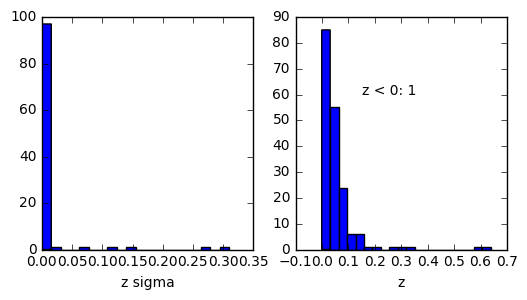

In [14]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(121)
ax.hist(single_gals['z_sig'], bins=20)
ax.set_xlabel('z sigma')

ax = fig.add_subplot(122)
ax.hist(single_spec['z'], bins=20)
ax.set_xlabel('z')
ax.text(0.15, 60, 'z < 0: '+str(np.sum(single_spec['z']<=0.)))

In [40]:
single_gals['z_sig'] = np.array(single_gals['z_sig'])
mask = (single_gals['z_sig']>=0.0001) & (single_gals['z_sig']<0.0002)

single_gals = Table(single_gals)
single_gals['objid','ra','dec', 'num_spec', 'z_avg', 'z_sig'][mask]

objid,ra,dec,num_spec,z_avg,z_sig
int64,float64,float64,int64,float64,float64
587730846887248218,312.7174,-0.3257026,2,0.03066706,0.00017593
587731186746589210,13.24084,0.3687539,2,0.033995065,0.000116245
587731187276775531,357.9702,0.7549612,2,0.037608345,0.000101075
587731187806044214,340.6111,1.195262,3,0.04756293,0.000150261086335
587731187817054248,5.757333,1.183321,3,0.1038094,0.000163228367633
587731187817971862,7.849824,1.139805,2,0.06689503,0.00015457
587731513150144647,35.90083,0.2256859,3,0.0250053266667,0.000116304874743
587731514222641154,33.00174,1.225666,3,0.02320314,0.000149062691733
587731514222641156,32.99956,1.218117,3,0.02320314,0.000149062691733


## Single spectra exploration
----------
### z_sig > 0.02

1. 587731187802505239 nearby star: 3542183441586036736

2. 587731511541432411 remove this object: "clump" is a superposition of another galaxy

3. 587731512079417464 remove nearby galaxy: 1702443460176406528
   
* 588015508728184928 remove nearby galaxy: 765687290109388800

* 588015509282816335 I'm to keep both spectra because I don't believe this galaxy is at z=0.6!!!

* 588015509813657703 two nearby gals: 1687819943095068672, 4206560876167884800

---------
### 0.002 < z_sig < 0.02

* 587731173305942556 remove star: 1107968287553120256

* 587731186208473201 damn. I find it so hard to believe that one of the "clumps" is really a galaxy at higher redshift!! :( Remove 4753614369211478016? 

* 587731512073388054 
    1. remove nearby galaxy: 452618114824169472
    2. there are two red squares indicating additional spectra but they don't exist
    
* 587734303802392898 nearby star: 1298168139355285504

* 588015508736966818 nearby star: 1222735037774981120

* 588015509281833251 high z galaxy overlapping: 1210441405109921792

### 0.0002 < z_sig < 0.002

* 587731512616747020 this is that same group/merger/star-forming weird thing
* 587731512616747024 same as above
* 588015508752891949 galaxy right next door is actually RIGHT NEXT DOOR; but we seem to be missing a spectrum from a bright clump that has a red square in Navigator but doesn't show up in my list. Sigh. Remove 463953812630038528?? (NOT YET -- this didn't get flagged in the Coadd sample...)

### 0.0001 < z_sig < 0.0002
* 587731187806044214 interacting gals: 4733520794650079232, 425678711476480000

In [49]:
remove_objids_single = [587731511541432411, 587731512616747020, 587731512616747024]
remove_specids_single = [3542183441586036736, 1702443460176406528,765687290109388800,
                         1687819943095068672, 4206560876167884800,1107968287553120256,
                         452618114824169472,1298168139355285504,1222735037774981120,
                         1210441405109921792,4733520794650079232, 425678711476480000,
                         459391381798938624]

## Remove "bad" spectra from both Coadd and Single samples

In [51]:
# Remove bad spec from single sample
print "Number of spectra before removal:",len(single_spec)
for specid in remove_specids_single:
    #loc = np.where(single_spec['specObjID']==specid)[0]
    try:
        single_spec.remove_row(np.where(single_spec['specObjID']==specid)[0][0])
    except:
        pass
print "Number of spectra after removal:",len(single_spec)

Number of spectra before removal: 183
Number of spectra after removal: 171


In [52]:
print "Number of spectra before removal:",len(coadd_spec)
for specid in remove_specids_coadd:
    #loc = np.where(single_spec['specObjID']==specid)[0]
    try:
        coadd_spec.remove_row(np.where(coadd_spec['specObjID']==specid)[0][0])
    except:
        pass
print "Number of spectra after removal:",len(coadd_spec)

Number of spectra before removal: 169
Number of spectra after removal: 151


In [71]:
# Now that spectra have been removed, some entire objects must be removed
# Remove the object from the GZH DR12 catalogs and their spectra from the spectra catalogs
remove_objids_single = [587731511541432411, 587731512616747020, 587731512616747024]
for objid in remove_objids_single: 
    try:
        clumpy_single_dr12.remove_row(np.where(clumpy_single_dr12['DR7objid']==objid)[0][0])
    except:
        pass
    
    try:
        single_spectra.remove_rows(np.where(single_spectra['OBJID']==objid)[0])
    except:
        pass
    
remove_objids_coadd = [8647474693019795713, 8647475120924131439, 8647475120901062764]
for objid in remove_objids_coadd: 
    try:
        clumpy_coadd_dr12.remove_row(np.where(clumpy_coadd_dr12['DR7objid']==objid)[0][0])
    except:
        pass
    try:
        coadd_spectra.remove_rows(np.where(coadd_spectra['OBJID']==objid)[0])
    except:
        pass

## Add spectral data to our clumpy catalogs

In [53]:
clumpy_coadd_dr12['num_spec'] = 0
clumpy_coadd_dr12['z_avg'] = 0.

clumpy_single_dr12['num_spec'] = 0
clumpy_single_dr12['z_avg'] = 0.

In [70]:
def aggregate_spectra(spectra_catalog):
    spectral_data = {'objid':[], 'ra':[], 'dec':[], 'num_spec':[], 'z_avg':[], 'z_sig':[]}
    spectra_by_grp = spectra_catalog.group_by('OBJID') 
    
    for grp in spectra_by_grp.groups:
        spectral_data['objid'].append(grp['OBJID'][0])
        spectral_data['num_spec'].append(len(grp))
        spectral_data['ra'].append(grp['RA'][0])
        spectral_data['dec'].append(grp['DEC'][0])
        spectral_data['z_avg'].append(np.mean(grp['z']))
        spectral_data['z_sig'].append(np.std(grp['z']))
        
    return spectral_data


def add_spec_values(clumpy_catalog, spectra_data):
    for idx, gal in enumerate(clumpy_catalog):
        objid = gal['DR7objid']
    
        if objid in spectra_data['objid']:
            loc = np.where(spectra_data['objid'] == gal['DR7objid'])[0]
            clumpy_catalog['num_spec'][idx] = spectra_data['num_spec'][loc]
            clumpy_catalog['z_avg'][idx] = spectra_data['z_avg'][loc]
            

# Re-aggregate all the spectra now that we've deleted all the "bad" ones
coadd_spectra_data = clumpy_spec_data = aggregate_spectra(coadd_spec)
single_spectra_data = clumpy_spec_data = aggregate_spectra(single_spec)

add_spec_values(clumpy_coadd_dr12, coadd_spectra_data)
add_spec_values(clumpy_single_dr12, single_spectra_data)

/home/oxymoronic/Software/miniconda2/envs/data-env/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/oxymoronic/Software/miniconda2/envs/data-env/lib/python2.7/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


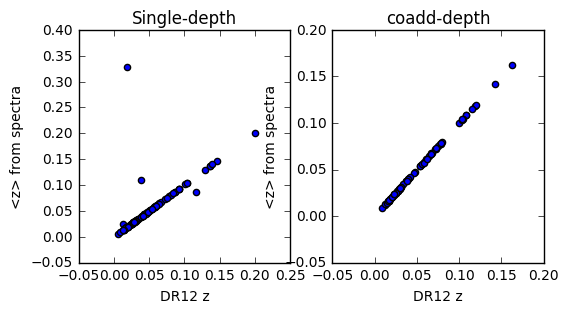

In [82]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(121)
ax.scatter(clumpy_single_dr12['z'], clumpy_single_dr12['z_avg'])
ax.set_xlabel('DR12 z')
ax.set_ylabel('<z> from spectra')
ax.set_title('Single-depth')

ax = fig.add_subplot(122)
ax.scatter(clumpy_coadd_dr12['z'], clumpy_coadd_dr12['z_avg'])
ax.set_xlabel('DR12 z')
ax.set_ylabel('<z> from spectra')
ax.set_title('coadd-depth')

In [80]:
mask = (clumpy_single_dr12['z_avg'] > 0.1) & (clumpy_single_dr12['z'] < 0.1)
print clumpy_single_dr12[mask]

#mask = (clumpy_coadd_dr12['z_avg'] >0.12) & (clumpy_coadd_dr12['z']<0.1)
#print clumpy_coadd_dr12[mask]

zooniverse_id     survey_id         Table    ...    z     num_spec   z_avg   
------------- ------------------ ----------- ... -------- -------- ----------
   AHZ5000efn 588015509282816335 sdss_single ... 0.019052        2 0.32896828


/home/oxymoronic/Software/miniconda2/envs/data-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [81]:
clumpy_coadd_dr12.remove_row(np.where(clumpy_coadd_dr12['DR7objid']==8647474693019795713)[0][0])

## Save our new and improved catalogs! 
Both the clumpy-DR12-GZH and the spectra list

In [44]:
clumpy_coadd_dr12.write('../data/2017-01-30_coadd-depth_clumpy_GZH_DR12_spectra.csv', overwrite=True)
clumpy_single_dr12.write('../data/2017-01-30_single-depth_clumpy_GZH_DR12_spectra.csv', overwrite=True)

coadd_spec.write('../data/2017-01-30_coadd-depth_clumpy_spectra_list.csv', overwrite=True)
single_spec.write('../data/2017-01-30_single-depth_clumpy_spectra_list.csv', overwrite=True)

In [3]:
# I came back to this after closing it down -- open those files back up
clumpy_coadd_dr12 = Table.read('../data/2017-01-30_coadd-depth_clumpy_GZH_DR12_spectra.csv')
clumpy_single_dr12 = Table.read('../data/2017-01-30_single-depth_clumpy_GZH_DR12_spectra.csv')

coadd_spectra = Table.read('../data/2017-01-30_coadd-depth_clumpy_spectra_list.csv')
single_spectra = Table.read('../data/2017-01-30_single-depth_clumpy_spectra_list.csv')

## SO HOW MANY GALAXIES DO WE HAVE AND WITH HOW MANY SPECTRA?

For our final sample, 36 galaxies are in BOTH the coadd- and single-depth catalogs
Of those, 28 have the same DR12 objid.

In [169]:
# How many in the coadd- and single-depth catalogs have identical DR12 identifiers?
print len(set(clumpy_coadd_dr12['DR12objid']) & set(clumpy_single_dr12['DR12objid']))
print len(clumpy_coadd_dr12)
print len(clumpy_single_dr12)

27
89
102


In [74]:
# But there is more overlap than that....
single_sample = SkyCoord(ra=clumpy_single_dr12['RA']*u.deg, 
                         dec=clumpy_single_dr12['DEC']*u.deg)

coadd_catalog = SkyCoord(ra=clumpy_coadd_dr12['RA']*u.deg,
                         dec=clumpy_coadd_dr12['DEC']*u.deg)

idx, d2d, d3d = single_sample.match_to_catalog_sky(coadd_catalog) 
within25as_single = (coadd_catalog[idx].separation(single_sample)<25*u.arcsec)

idx, d2d, d3d = coadd_catalog.match_to_catalog_sky(single_sample)
within25as = (single_sample[idx].separation(coadd_catalog)<25*u.arcsec)

b1 = clumpy_coadd_dr12['DR7objid','DR12objid','RA','DEC'][within25as]
b2 = clumpy_single_dr12['DR7objid', 'DR12objid','RA','DEC'][within25as_single]

In [88]:
from astropy.table import vstack

# Add a column to all_unique_clumpy that identifies which single-depth gals
# have coadd-depth metadata associated with them
clumpy_single_dr12['both_imaging'] = np.zeros(len(clumpy_single_dr12), dtype=bool)
clumpy_single_dr12['both_imaging'][within25as_single] = 1
clumpy_coadd_dr12['both_imaging'] = np.zeros(len(clumpy_coadd_dr12), dtype=bool)

# Take all the single-depth galaxies and tack on those in the coadd-depth 
# that are NOT found in the cross-matching above
all_unique_clumpy = vstack([clumpy_single_dr12, clumpy_coadd_dr12[~within25as]])
print len(all_unique_clumpy)

155


In [89]:
# Also keep track of the coadd-depth info associated with those gals that have BOTH
coadd_for_both_imaging = clumpy_coadd_dr12[within25as]
print len(coadd_single)

36


In [7]:
shared_spec = set(coadd_spectra['specObjID']) & set(single_spectra['specObjID'])
len(shared_spec)
(len(coadd_spectra)-73) + len(single_spectra)

234

# 156 Unique Galaxies w/ 234 Unique Spectra

1. create one big happy combined catalog
2. how many galaxies DO NOT have spectra?
3. how many galaxies have only 1 spectrum?
4. how many galaxies have > 1 spec and z < 0.06

At some point: Create one big happy catalog of all unique clumpy galaxies

In [104]:
print np.sum(all_unique_clumpy['num_spec']==0), 'galaxies have NO SPECTRA'

5 galaxies have NO SPECTRA


In [105]:
print np.sum(all_unique_clumpy['num_spec']>1), "galaxies with more than 1 spectrum"

67 galaxies with more than 1 spectrum


In [170]:
final_sample = (all_unique_clumpy['num_spec']>=1) & (all_unique_clumpy['z_avg']<0.06)
print np.sum( final_sample), 'galaxies with at least 1 spectrum and z < 0.06'
print np.sum(all_unique_clumpy['num_spec'][final_sample]), "spectra belong to these gals."

105 galaxies with at least 1 spectrum and z < 0.06
175 spectra belong to these gals.


## Yay! We have lots more than we did before!!!

In [156]:
# Save the final sample of low-z clumpy gals
all_unique_clumpy[final_sample].write('../data/2017-01-30_final_clumpy_sample.csv',overwrite=True)

final_gals = all_unique_clumpy[final_sample]

# need intersection: final sample with both Coadd- and Single-depth img
mask = (coadd_for_both_imaging['z_avg']<0.06) & \
           (coadd_for_both_imaging['num_spec']>=1)
print np.sum(mask), 'galaxies meet the z criterion and have both types of imaging'
coadd_for_both_imaging[mask].write('../data/2017-01-30_coadd_info_for_final_sample_with_both.csv')

final_gals_both_imaging = coadd_for_both_imaging[mask]

26 galaxies meet the z criterion and have both types of imaging


In [167]:
# Save the list of spectra associated with those galaxies specifical
all_spectra = vstack([coadd_spectra, single_spectra])

idx = []
idx2 = []
for i, spec in enumerate(all_spectra):
    if spec['OBJID'] in final_gals['DR7objid']:
        idx.append(i)
        
    if spec['OBJID'] in final_gals_both_imaging['DR7objid']:
        idx2.append(i)
    
final_spectra = all_spectra[idx]
coadd_spec_both_imaging = all_spectra[idx2]
print len(final_spectra)
print len(coadd_spec_both_imaging)
print len(set(coadd_spec_both_imaging['specObjID'])-set(final_spectra['specObjID']))

# Join current list of spec for final sample with any addl spectra associated
# with the coadd-depth imaging for those gals which have both depth imaging
final_spectra_freals = join(coadd_spec_both_imaging, final_spectra, 
                            keys=['specObjID', 'DR12objid', 'plate', 'mjd', 'fiberID',
                                  'z', 'zErr','ra2','dec2'], 
                            join_type='outer')

175
55
0


In [168]:
final_spectra.write('../data/2017-01-30_final_clumpy_spectra_list.csv', overwrite=True)

(array([ 55.,   0.,   0.,  33.,   0.,   0.,  14.,   0.,   0.,   3.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

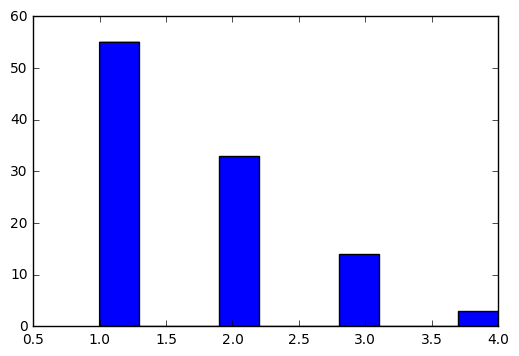

In [174]:
plt.hist(final_gals['num_spec'])